# 2021 Peruvian Presidential Elections Results

The document has for objective to web scrap the 2021 Peruvian Presidential Elections Results from 
vote of Peruvians abroad on ONPE web page, for this task `selenium` library is required.

The document is based in an assignment from the course of Python for Data Science, imparted by [Alexander Quispe](https://alexanderquispe.github.io/) and [Azony Quispe](https://github.com/anzonyquispe). The initial assignment was made in collaboration with [Juan Azula](https://azula89.github.io/azulajuan/), [Antonio Ayala](https://github.com/antonio-ayala), [Ana Paula Carrillo](https://github.com/humitaz) and [Mario Rios](https://github.com/MaRios2212).

# <a id='outline'> Document Outline </a>
- <a href='#1_Lib'> 1. Libraries required </a>
- <a href='#2_web_page'> 2. Webpage </a>
- <a href='#3_scope'> 3. Scope </a>
- <a href='#4_set_up'> 4. Set Up before loop </a>
- <a href='#5_loop'> 5. Loop for webscraping </a>
- <a href='#6_final_data'> 6. Data processing and storing </a>

## <a id='1_Lib'> 1. Libraries required </a>

In [1]:
#!pip install lxml
#!pip install lxmunidecodel
#!pip install unidecode


import os
import time
import re
import unidecode
import time 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from webdriver_manager.chrome import ChromeDriverManager
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter

## <a id='2_web_page'> 2. Webpage </a>

One option direct link (does not work every time)

In [2]:
#ChromeDriverManager
#driver = webdriver.Chrome( ChromeDriverManager().install() )
#driver.maximize_window()
#url = 'https://resultadoshistorico.onpe.gob.pe/EG2021/EleccionesPresidenciales/RePres/E'
#driver.get( url )
#driver.execute_script( "document.body.style.zoom='100%'" )

Second options, "ONPE Resultado Historico" link and access with clicks. May require time sleep of 10 or more seconds

In [3]:
ChromeDriverManager
driver = webdriver.Chrome( ChromeDriverManager().install() )
driver.maximize_window()
url = 'https://resultadoshistorico.onpe.gob.pe/EG2021/'
driver.get( url )
driver.execute_script( "document.body.style.zoom='100%'" )

presi = driver.find_element_by_xpath('/html/body/onpe-root/onpe-home-onpe/div[1]/div/div/div/div[2]/div[2]/div/div/a/div[2]')
presi.click()
time.sleep(5)



====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/97.0.4692.71/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\josed\.wdm\drivers\chromedriver\win32\97.0.4692.71]


## <a id='3_scope'> 3. Scope </a>

In this part we get all the element from the scope and select our element of interest (i.e. Extranjero)

In [4]:
# Get the socpe by element_id
#scope = driver.find_element_by_id( "select_ambito" )
scope = driver.find_element_by_xpath('/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[3]/div[1]/div[1]/div/div/div/select')

# All selenium objects in scope
scope_options = [ x for x in scope.find_elements_by_tag_name("option") ]
dict_scope_options = { option.text : option for option in scope_options }

# We click on Extranjero
dict_scope_options['EXTRANJERO'].click()

## <a id='4_set_up'> 4. Set Up before loop </a>

In [5]:
# Store all_tables
all_tables = {}

# All selenium objects in continen selection
cnt = Select( driver.find_element_by_xpath( "/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[3]/div[1]/div[1]/div/div/div[2]/select" ) )

# Get number of total options
num_cont = len( cnt.options )

## <a id='5_loop'> 5. Loop for webscraping </a>

In [6]:
######## Continents ########
for cont_idx in range( num_cont ):
    time.sleep(1)
    cont = Select(driver.find_element_by_xpath("/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[3]/div[1]/div[1]/div/div/div[2]/select" ) )
    continent = cont.options[ cont_idx ]
    
    # Get continent name
    cont_name = continent.text
    
    # We select a different continent name
    if cont_name != "--TODOS--" :
        
        # click on continent
        continent.click()
        
######## Countries ########

     # Get all elements of country
        time.sleep(1)
        pais = Select( driver.find_element_by_xpath("/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[3]/div[1]/div[1]/div/div/div[3]/select"))
        num_pais = len( pais.options )   
       
        for pais_idx in range( num_pais ):
            pais = Select( driver.find_element_by_xpath("/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[3]/div[1]/div[1]/div/div/div[3]/select" ) )
            country = pais.options[ pais_idx ]
        
        
        # Get country name
            pais_name = country.text
            
            if pais_name != "--TODOS--" :
                          
                # click on country
                country.click()

######## States ########

                
                # Get all elements from estado
                time.sleep(1)
                est = Select( driver.find_element_by_xpath("/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[3]/div[1]/div[1]/div/div/div[4]/select" ) )
                num_est = len( est.options )
                
                for est_idx in range( num_est ):
                    
                    # Get again all states
                    est = Select( driver.find_element_by_xpath("/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[3]/div[1]/div[1]/div/div/div[4]/select") )
                    state = est.options[ est_idx ]
                    
                    # Get states name
                    est_name = state.text
                    if est_name != "--TODOS--" :
                        
                        # click on state
                        state.click()
                        time.sleep(1)
######## Consolidation ########
                        
                        # Get UBIGEO
                        ubigeo = driver.current_url.split("/")[ -1 ]
                        
                        ## Get table of presidential votes
                        # Get html at this point
                        # No id for the table wrap, so full xpath 
                        # is used instead
                        table_path = driver.find_element_by_xpath( "/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[4]/div[1]/div[3]/div" )
                        table_html = table_path.get_attribute( 'innerHTML' )
                        # Read the table using pandas
                        table = pd.read_html( table_html )
                        
                        # Cleaning tables
                        row_new_columns = table[ 0 ].iloc[ 0 , 2: ]
                        clean_columns = row_new_columns \
                                              .str.replace( " ", "_") \
                                              .str.lower().str.replace( "%", "share_") \
                                              .apply( lambda x : unidecode.unidecode( x ) ) \
                                              .tolist()
                        
                        # Selecting specific columns
                        table_clean = table[0].iloc[ 1:, 2: ].copy()
                        
                        # rename columns
                        table_clean.columns = clean_columns
                        
                        # New values to columns 
                        table_clean[ 'continent' ] = cont_name
                        table_clean[ 'country' ]   = pais_name
                        table_clean[ 'estate' ]    = est_name
                        table_clean[ 'ubigeo' ]    = ubigeo
                        table_clean[ 'link' ]      = driver.current_url
                        
                        # store tables
                        all_tables[ ubigeo ] = table_clean                       

## <a id='6_final_data'> 6. Data processing and storing </a>

In [7]:
final_data = pd.concat( all_tables.values() ).reset_index( drop = True )
final_data = final_data.rename( columns={'organizaciones_politicas': 'political_parties',
                                         'share_validos': 'share_valid',
                                         'share_emitidos': 'share_emitied'})
final_data['total'] = pd.to_numeric(final_data['total'])
final_data.to_excel( r'../_results/2021_elections_peru.xlsx' , index = False )
final_data

,political_parties,total,share_valid,share_emitied,continent,country,estate,ubigeo,link
0,PARTIDO NACIONALISTA PERUANO,0,0.000%,0.000%,AFRICA,ARGELIA,ARGEL,910101,https://resultadoshistorico.onpe.gob.pe/EG2021...
1,"EL FRENTE AMPLIO POR JUSTICIA, VIDA Y LIBERTAD",0,0.000%,0.000%,AFRICA,ARGELIA,ARGEL,910101,https://resultadoshistorico.onpe.gob.pe/EG2021...
2,PARTIDO MORADO,0,0.000%,0.000%,AFRICA,ARGELIA,ARGEL,910101,https://resultadoshistorico.onpe.gob.pe/EG2021...
3,PERU PATRIA SEGURA,0,0.000%,0.000%,AFRICA,ARGELIA,ARGEL,910101,https://resultadoshistorico.onpe.gob.pe/EG2021...
4,VICTORIA NACIONAL,0,0.000%,0.000%,AFRICA,ARGELIA,ARGEL,910101,https://resultadoshistorico.onpe.gob.pe/EG2021...
...,...,...,...,...,...,...,...,...,...
4658,ALIANZA PARA EL PROGRESO,0,0.000%,0.000%,OCEANIA,NUEVA ZELANDA,WELLINGTON,950202,https://resultadoshistorico.onpe.gob.pe/EG2021...
4659,TOTAL DE VOTOS VÁLIDOS,34,100.000%,97.143%,OCEANIA,NUEVA ZELANDA,WELLINGTON,950202,https://resultadoshistorico.onpe.gob.pe/EG2021...
4660,VOTOS EN BLANCO,0,NaN,0.000%,OCEANIA,NUEVA ZELANDA,WELLINGTON,950202,https://resultadoshistorico.onpe.gob.pe/EG2021...
4661,VOTOS NULOS,1,NaN,2.857%,OCEANIA,NUEVA ZELANDA,WELLINGTON,950202,https://resultadoshistorico.onpe.gob.pe/EG2021...


Summary chart

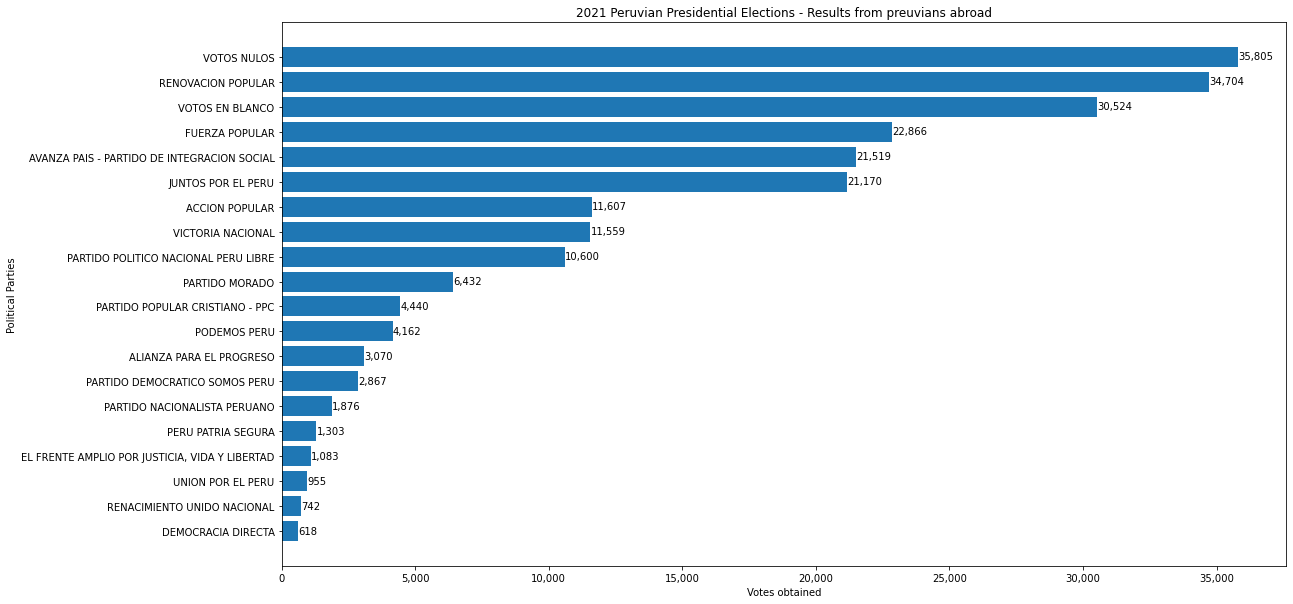

In [8]:
# Generate data by politial partie
data_partie = final_data.groupby("political_parties",as_index=False)["total"].sum().sort_values('total')
data_partie = data_partie[data_partie.political_parties != "TOTAL DE VOTOS EMITIDOS"]
data_partie = data_partie[data_partie.political_parties != "TOTAL DE VOTOS VÁLIDOS"]

# Generate indepent lists
partie = data_partie["political_parties"].tolist()
votes = data_partie["total"].tolist()

# Generate graph
fig, ax = plt.subplots(figsize=(18, 10))

plt.barh(partie, votes)
plt.xlabel("Votes obtained")
plt.ylabel("Political Parties")
plt.title("2021 Peruvian Presidential Elections - Results from preuvians abroad")
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

for i, v in enumerate(votes):
    ax.text(v+10, i-0.1, str(f"{v:,}"), color='black')

plt.savefig(r"..\_images\peruvians_abroad.png", bbox_inches='tight')
plt.savefig(r"..\_images\peruvians_abroad.eps", bbox_inches='tight')    
plt.show()